In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings("ignore")


load dataset

In [ ]:
df = pd.read_csv("Global WFP Food Prices.csv")
df.head()


,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266.0,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465.0,Day,actual,Retail,AFN,150000.00,3205.81
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267.0,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465.0,Day,actual,Retail,AFN,100000.00,2137.21
2,AFG,2000-01-15,Hirat,Hirat,Hirat,270.0,34.35,62.20,cereals and tubers,Bread,55.0,KG,actual,Retail,AFN,15.63,0.33
3,AFG,2000-01-15,Hirat,Hirat,Hirat,270.0,34.35,62.20,cereals and tubers,Wheat,84.0,KG,actual,Retail,AFN,9.13,0.20
4,AFG,2000-01-15,Hirat,Hirat,Hirat,270.0,34.35,62.20,cereals and tubers,Wheat flour,58.0,KG,actual,Retail,AFN,10.06,0.22


cleaning data

In [ ]:
# Remove rows where target is missing
df = df.dropna(subset=['price_usd'])

# Drop remaining missing values
df = df.dropna()


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


price distribution

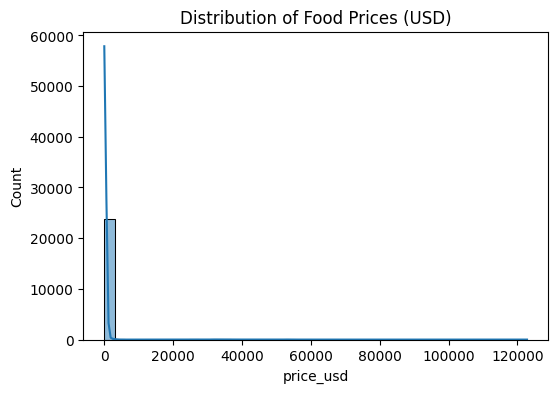

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['price_usd'], bins=40, kde=True)
plt.title("Distribution of Food Prices (USD)")
plt.show()


Average price by food categoty

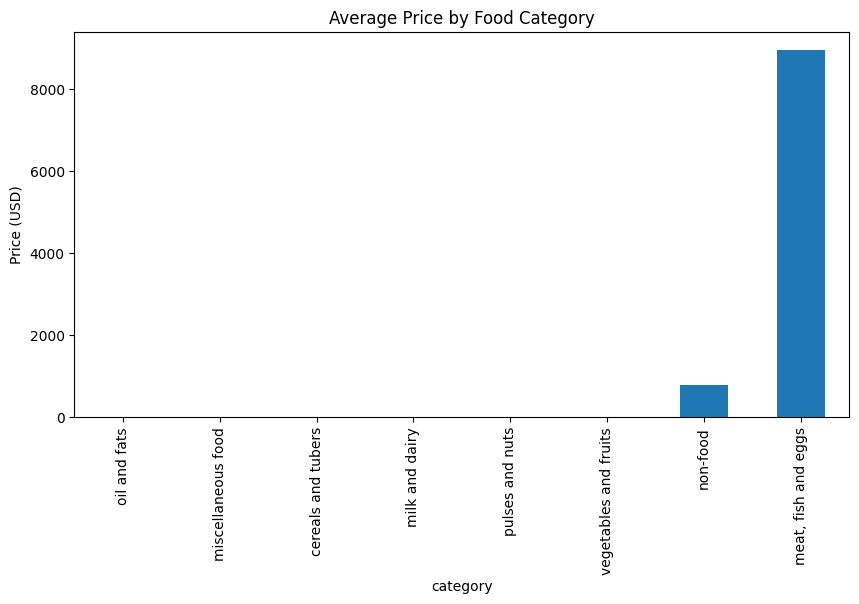

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('category')['price_usd'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Food Category")
plt.ylabel("Price (USD)")
plt.show()


EDA

In [ ]:
le = LabelEncoder()

cat_cols = [
    'country_code','county','subcounty','market','category',
    'commodity','unit','price_flag','price_type','currency'
]

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
df['high_price'] = (df['price_usd'] > df['price_usd'].median()).astype(int)


Feature & Target

In [ ]:
X = df.drop(['price_usd', 'date'], axis=1)
y = df['price_usd']


spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear Regression

In [ ]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

y_pred_lr = reg_lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


MAE: 157.35535420202373
RMSE: 1172.551222654481
R2: 0.9111990288701686


cv / MSE/RMSE/R2

In [ ]:
from sklearn.model_selection import cross_val_score

# Define model
lr = LinearRegression()

# Cross-validation RMSE
cv_lr_scores = cross_val_score(
    lr,
    X_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)
cv_lr_rmse = -cv_lr_scores.mean()

# Train model
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

print("Linear Regression CV RMSE:", round(cv_lr_rmse, 3))
print("Linear Regression Test RMSE:",
      round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 3))
print("Linear Regression Test R2:",
      round(r2_score(y_test, y_pred_lr), 3))


Linear Regression CV RMSE: 1102.32
Linear Regression Test RMSE: 1172.551
Linear Regression Test R2: 0.911


RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2  :", r2_score(y_test, y_pred_rf))



Random Forest Regressor
MAE : 8.634941618196834
RMSE: 277.88142476922354
R2  : 0.9950126126268191


In [ ]:
# Define model
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Cross-validation RMSE
cv_rf_scores = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring='neg_root_mean_squared_error'
)
cv_rf_rmse = -cv_rf_scores.mean()

# Train model
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

print("Random Forest CV RMSE:", round(cv_rf_rmse, 3))
print("Random Forest Test RMSE:",
      round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3))
print("Random Forest Test R2:",
      round(r2_score(y_test, y_pred_rf), 3))


Random Forest CV RMSE: 338.206
Random Forest Test RMSE: 277.881
Random Forest Test R2: 0.995


Neural Network Regression

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=300
)

mlp.fit(X_train, y_train)
y_pred_nn = mlp.predict(X_test)

print("\nNeural Network Regressor")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("R2  :", r2_score(y_test, y_pred_nn))



Neural Network Regressor
RMSE: 48.93864777896323
R2  : 0.9998453115107582


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)
grid.best_params_


{'max_depth': 20, 'n_estimators': 100}

feature selection

In [32]:
selector_reg = SelectKBest(score_func=f_regression, k=10)
X_train_reg = selector_reg.fit_transform(X_train, y_train)
X_test_reg = selector_reg.transform(X_test)


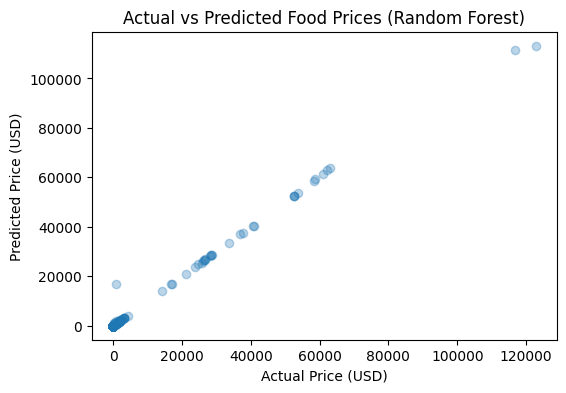

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted Food Prices (Random Forest)")
plt.show()


In [34]:
# Print final regression comparison table

final_results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest Regressor'
    ],
    'Features Used': [
        'Selected (All)',
        'Selected (All)'
    ],
    'CV Score (RMSE)': [
        round(cv_lr_rmse, 3),
        round(cv_rf_rmse, 3)
    ],
    'Test RMSE': [
        round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 3),
        round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3)
    ],
    'Test R-squared': [
        round(r2_score(y_test, y_pred_lr), 3),
        round(r2_score(y_test, y_pred_rf), 3)
    ]
})

print("\nTable 2: Comparison of Final Regression Models\n")
final_results



Table 2: Comparison of Final Regression Models



,Model,Features Used,CV Score (RMSE),Test RMSE,Test R-squared
0,Linear Regression,Selected (All),1102.320,1172.551,0.911
1,Random Forest Regressor,Selected (All),338.206,277.881,0.995
